# Random Numbers

## Table of Contents
1. [Linear congruential generator (LCG)](#Linear-congruential-generator-(LCG))
2. [Inverse transform sampling for exponential distribution](#Inverse-transform-sampling-for-exponential-distribution)
3. [Normal distribution](#Normal-distribution)


## Linear congruential generator (LCG)
$$ x_{i+1} = (ax_i+c)\ mod\ m $$

Numbers are generated by calculating consecutive numbers from the formula above. These numbers range from 0 to m-1. If the parameters are well picked, the generator generates all integers from 0 to m-1 (or from 1 to m-1 when c=0).

An example of a selection of good parameters:
- a - expression a-1 is divisible by each prime factor of m and if m is divisible by 4, then a-1 is also divisible by 4
- c - coprime with m (GCD(c,m) = 1)
- m - 1 greater than the maximum number to generate

The number $ x_0 $ is the seed. It is the number from which the generator starts to generate. By setting it to the same number in different program executions we can obtain the same sequence of generated numbers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
class LCG:
    def __init__(self, a, c, m):
        self.a = a
        self.c = c
        self.m = m
        self.x = 1
    
    def set_seed(self, seed):
        self.x = seed
        
    def random(self):
        self.x = (self.a*self.x + self.c) % self.m
        return self.x

Example of LCG with random parameters that do not give the full range of numbers from 0 to m-1

In [3]:
generator = LCG(3,4,20)
amount = 20
r = [generator.random() for _ in range(amount)]
r

[7, 5, 19, 1, 7, 5, 19, 1, 7, 5, 19, 1, 7, 5, 19, 1, 7, 5, 19, 1]

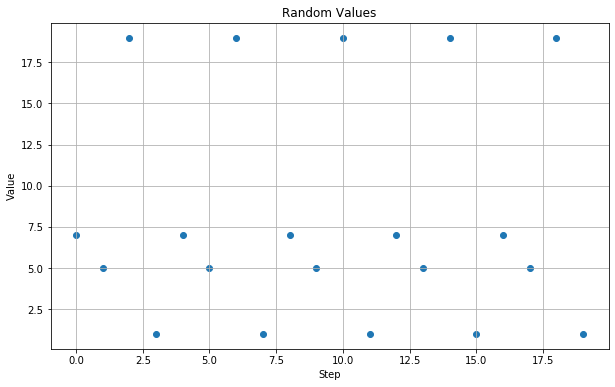

In [4]:
xs = range(amount)
plt.scatter(xs, r)
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Random Values")
plt.grid(True)
plt.show()

In [5]:
def is_good_params(a,c,m):
    generator = LCG(a,c,m)
    r = [generator.random() for _ in range(m)]
    ru = np.unique(r)
    return len(ru) == m

In [6]:
is_good_params(3,4,20)

False

Example of LCG with good parameters that give a full range from 0 to m-1

In [7]:
generator = LCG(13,7,12)
amount = 12
r = [generator.random() for _ in range(amount)]
r

[8, 3, 10, 5, 0, 7, 2, 9, 4, 11, 6, 1]

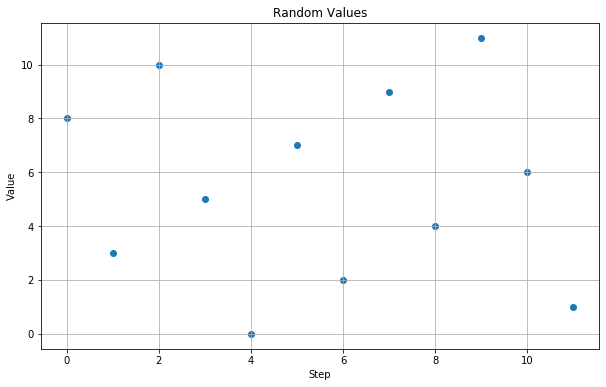

In [8]:
xs = range(amount)
plt.scatter(xs, r)
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Random Values")
plt.grid(True)
plt.show()

In [9]:
is_good_params(13,7,12)

True

Below is generator of good parameters according to the rules given above

In [10]:
def get_good_params(x_max):
    m = x_max + 1
    
    c = np.random.randint(1,m-1)
    while(np.gcd(c,m) != 1):
        c = np.random.randint(1,m-1)
    
    a = 1
    sq = int(np.sqrt(m))
    mc = m
    for d in range(2,sq+1):
        if mc % d == 0:
            a *= d
            mc /= d
            while mc % d == 0:
                mc /= d
        if d > mc:
            break
    a *= mc
    if m % 4 == 0:
        a *= 2
    a += 1
    
    return int(a),c,m

In [11]:
a,c,m = get_good_params(423)
a,c,m

(213, 153, 424)

In [12]:
is_good_params(a,c,m)

True

## Inverse transform sampling for exponential distribution

### Probability density function (PDF):
$$ f(x) = \lambda e^{-\lambda x} $$
where
$$ x \in [0; \infty) $$
$$ \lambda > 0 $$

In [13]:
def exp_pdf(lmbd, x):
    return lmbd * np.exp(-lmbd*x)

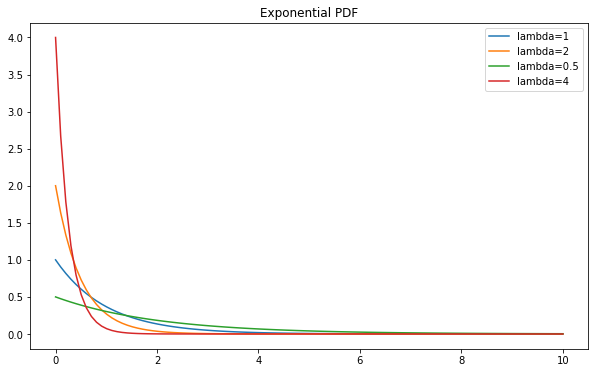

In [14]:
xs = np.linspace(0, 10, 100)
plt.title("Exponential PDF")
plt.plot(xs, exp_pdf(1, xs), label="lambda=1")
plt.plot(xs, exp_pdf(2, xs), label="lambda=2")
plt.plot(xs, exp_pdf(0.5, xs), label="lambda=0.5")
plt.plot(xs, exp_pdf(4, xs), label="lambda=4")
plt.legend()
plt.show()

### Cumulative distribution function (CDF):  
$$ F(x) = 1 - e^{-\lambda x} $$

In [15]:
def exp_cdf(lmbd, x):
    return 1 - np.exp(-lmbd*x)

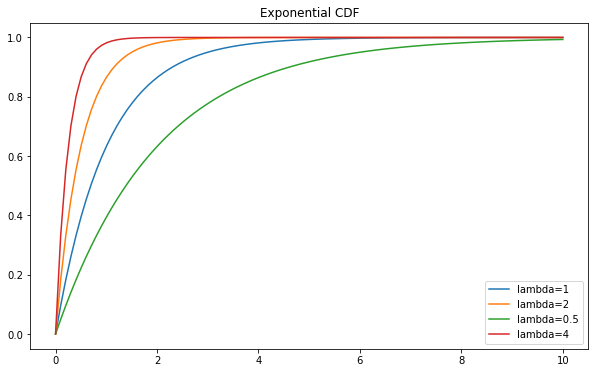

In [16]:
xs = np.linspace(0, 10, 100)
plt.title("Exponential CDF")
plt.plot(xs, exp_cdf(1, xs), label="lambda=1")
plt.plot(xs, exp_cdf(2, xs), label="lambda=2")
plt.plot(xs, exp_cdf(0.5, xs), label="lambda=0.5")
plt.plot(xs, exp_cdf(4, xs), label="lambda=4")
plt.legend()
plt.show()

### Inverse cumulative distribution function (ICDF):
$$ x = F^{-1}(F(x)) = -\frac{1}{\lambda} \ln(1-F(x)) $$
where  
$$ F(x) \in [0,1] $$

In [17]:
def exp_icdf(lmbd, F):
    return -1/lmbd * np.log(1-F)

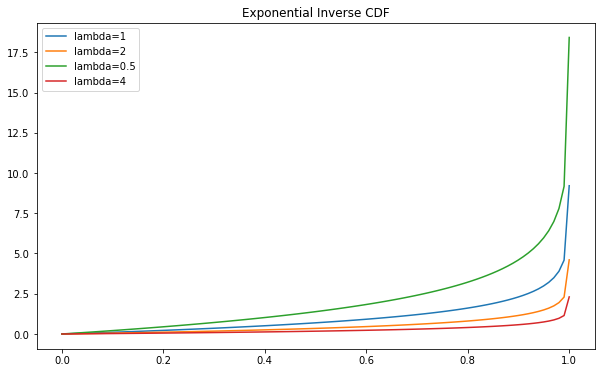

In [18]:
xs = np.linspace(0, 0.9999, 100)
plt.title("Exponential Inverse CDF")
plt.plot(xs, exp_icdf(1, xs), label="lambda=1")
plt.plot(xs, exp_icdf(2, xs), label="lambda=2")
plt.plot(xs, exp_icdf(0.5, xs), label="lambda=0.5")
plt.plot(xs, exp_icdf(4, xs), label="lambda=4")
plt.legend()
plt.show()

### Random values with exponential distribution
We generate numbers in the range (0,1) and then calculate the inverse cumulative distribution function (ICDF) for them. As a result, we get numbers with an exponential distribution.

In [19]:
def exp_random(lmbd=1, size=None):
    uniform_samples = None
    if size is None:
        uniform_samples = np.random.random()
    else:
        uniform_samples = np.random.random(size)
    return exp_icdf(lmbd, uniform_samples)

In [20]:
lmbd = 2
size = 1000
exp_r = exp_random(lmbd, size)

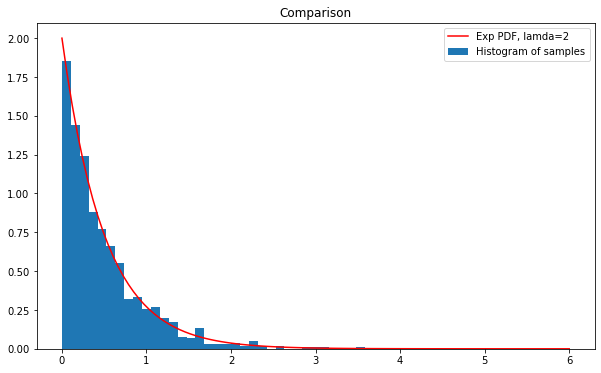

In [21]:
xs = np.linspace(0,6, 100)
plt.hist(exp_r, bins="auto", density=True, label="Histogram of samples")
plt.plot(xs, exp_pdf(lmbd, xs), color="red", label="Exp PDF, lamda="+str(lmbd))
plt.legend()
plt.title("Comparison")
plt.show()

## Normal distribution

Normal distribution:
$$ f_{\mu , \sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)} $$
where  
$ \mu $ - expected value  
$ \sigma $ - standard deviation  

In [22]:
def normal_pdf(mean, sd, x):
    return 1/(sd*np.sqrt(2*np.pi))*np.exp(-((x-mean)**2)/(2*sd**2))

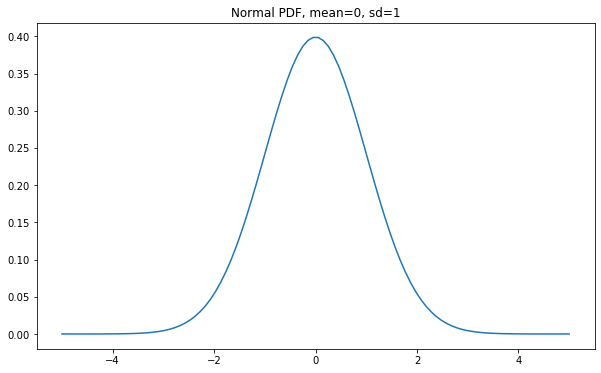

In [23]:
xs = np.linspace(-5, 5, 100)
plt.title("Normal PDF, mean=0, sd=1")
plt.plot(xs, normal_pdf(0,1, xs))
plt.show()

### Box-Muller transform

#### Derivation
We'll start with the standard normal distribution
$$ f_{0,1}(x) = exp\left(\frac{-x^2}{2}\right) $$

We take two independent normal distributions and we calculate the cumulative probability

$$ p(x_1,x_2) = exp\left(\frac{-x_1^2}{2}\right)*exp\left(\frac{-x_2^2}{2}\right) = exp\left(-\frac{x_1^2+x_2^2}{2}\right) $$

We introduce polar coordinates:
$$ r^2 = x_1^2 + x_2^2 \\ $$
$$ x_1 = r sin(\phi) $$
$$ x_2 = r cos(\phi) \\ $$
$$ r \in [0, \infty] $$
$$ \phi \in [0, 2\pi] $$

Transition:
$$ p(x,y)\ dx\ dy = p(r,\phi)\ r\ d\phi\ dr $$

What gives us :
$$ exp\left(-\frac{r^2}{2}\right)\ r\ d\phi\ dr $$

We substitute the variable:
$$ z = \frac{r^2}{2} \\ $$
$$ dz = r\ dr \\ $$
$$ e^{-z}\ d\phi\ dz $$

We got the exponential distribution  
Using the reverse cumulative distribution function (ICDF):
$$ F^{-1}(F(x)) = -\ln(1-F(x)) $$
and the inverse function:
$$ z = \frac{r^2}{2} $$ czyli $$ r = \sqrt{2z} $$

we get:
$$ x_1 = r cos(\phi) = \sqrt{-2\ln(1-U_1)}\ cos(2 \pi U_2) \\ $$
$$ x_2 = r sin(\phi) = \sqrt{-2\ln(1-U_1)}\ sin(2 \pi U_2) $$
where  
$ U_1, U_2 $ - independent random variables from uniform distribution (0,1)  
$ x_1, x_2 $ - Independent random variables from the standard normal distribution

#### Any normal distribution
If we want to have any normal and not only the standard one, we use the standardization formula:
$$ Z = \frac{X-\mu}{\sigma} $$
and after transformation:
$$ X = Z\sigma + \mu $$
then
$$ y_1 = x_1 \sigma + \mu $$
$$ y_2 = x_2 \sigma + \mu $$

In [24]:
def normal_random(mean=0, sd=1, size=None):
    u = None
    if size is None:
        u = np.random.random((1,2))
    else:
        u = np.random.random((size,2))
    x1 = np.sqrt(-2*np.log(1 - u[:,0])) * np.cos(2*np.pi*u[:,1])
    x2 = np.sqrt(-2*np.log(1 - u[:,0])) * np.sin(2*np.pi*u[:,1])
    x1 = x1*sd + mean
    x2 = x2*sd + mean
    return np.concatenate([x1, x2])

In [25]:
mean = 10
sd = 3
ns = normal_random(mean,sd, 1000)

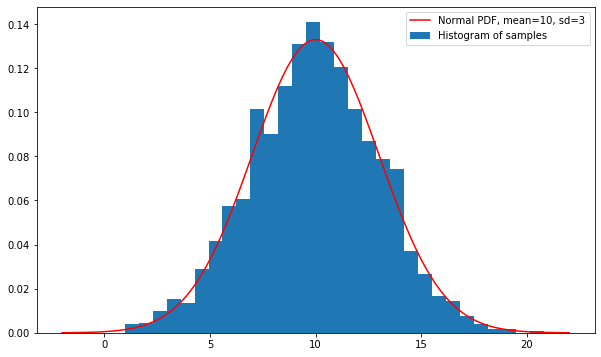

In [26]:
xs = np.linspace(mean-4*sd, mean+4*sd, 100)
plt.hist(ns, bins="auto", density=True, label="Histogram of samples")
plt.plot(xs, normal_pdf(mean,sd, xs), color="red", 
         label="Normal PDF, mean="+str(mean)+", sd="+str(sd))
plt.legend()
plt.show()

### Marsaglia polar method
An improvement to the Box-Muller method is the Marsaglia polar method, which does not use trigonometric functions.

Instead of using $ U_1, U_2 $ we use $ V_1, V_2 $ which are in a unit circle:  
$ R = V_1^2 + V_2^2 < 1 $  
$ U_1 $ - $ R $  
$ U_2 $ - the angle between the x axis and the straight line through the center of the coordinate system and the point $ (V_1,V_2) $  

Because of this we have:
$$ cos(2 \pi U_2) = \frac{V_1}{\sqrt{R}} \\ $$
$$ sin(2 \pi U_2) = \frac{V_2}{\sqrt{R}} $$

What gives in the end:
$$ x_1 = \sqrt{-2\ln(R)}\ \frac{V_1}{\sqrt{R}} = \sqrt{\frac{-2\ln(R)}{R}}\ V_1 \\[20pt] $$
$$ x_2 = \sqrt{-2\ln(R)}\ \frac{V_2}{\sqrt{R}} = \sqrt{\frac{-2\ln(R)}{R}}\ V_2 $$

In [27]:
def normal_random2(mean=0, sd=1, size=None):
    v1 = v2 = None
    if size is None:
        v1 = np.random.random() *2 -1   #[-1, 1)
        v2 = (np.random.random() *2 -1) * np.sqrt(1 - v1**2)
    else:
        v1 = np.random.random(size) *2 -1   #[-1, 1)
        v2 = (np.random.random(size) *2 -1) * np.sqrt(1 - v1**2)
    r = v1**2 + v2**2
    
    s = np.sqrt((-2*np.log(r))/r)
    x1 = v1 * s
    x2 = v2 * s
    x1 = x1*sd + mean
    x2 = x2*sd + mean
    return np.concatenate([x1, x2])

In [28]:
mean = 10
sd = 3
ns = normal_random2(mean, sd, 1000)

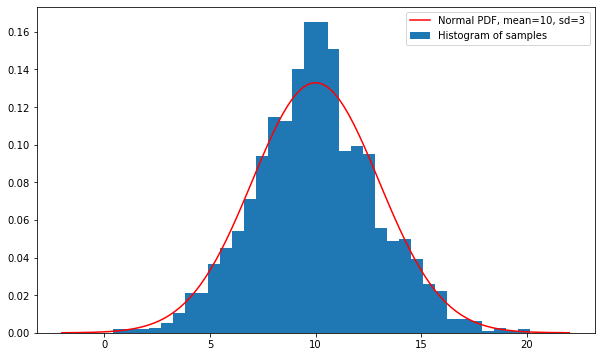

In [29]:
xs = np.linspace(mean-4*sd, mean+4*sd, 100)
plt.hist(ns, bins="auto", density=True, label="Histogram of samples")
plt.plot(xs, normal_pdf(mean,sd, xs), color="red", 
         label="Normal PDF, mean="+str(mean)+", sd="+str(sd))
plt.legend()
plt.show()